# **Challenge Store Sales**
> Mariana Castro Payns A01706038

> Maria de los Angeles Arista Huerta A01369984

> Marcela Ibarra Mora A01231973

### *Import libraries*

In [83]:
!pip install plotly

In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### *Import Data*

In [85]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_transactions = pd.read_csv('transactions.csv')
df_stores = pd.read_csv('stores.csv')
df_oil = pd.read_csv('oil.csv')
df_holidays = pd.read_csv('holidays_events.csv')

In [86]:
#Change date format
df_train["date"] = pd.to_datetime(df_train.date)
df_test["date"] = pd.to_datetime(df_test.date)
df_transactions["date"] = pd.to_datetime(df_transactions.date)
df_oil["date"] = pd.to_datetime(df_oil.date)
df_holidays["date"] = pd.to_datetime(df_holidays.date)

First we check the correlation for transactions and train dataframes.

In [87]:
train_ds = df_train.groupby(["date","store_nbr"]).sales.sum().reset_index()
temp_train = pd.merge(train_ds,df_transactions,how="left")
temp_train.corr()

store_nbr     sales  transactions
store_nbr      1.000000  0.150939      0.189311
sales          0.150939  1.000000      0.837384
transactions   0.189311  0.837384      1.000000

In [88]:
temp_train

date  store_nbr         sales  transactions
0     2013-01-01          1      0.000000           NaN
1     2013-01-01          2      0.000000           NaN
2     2013-01-01          3      0.000000           NaN
3     2013-01-01          4      0.000000           NaN
4     2013-01-01          5      0.000000           NaN
...          ...        ...           ...           ...
90931 2017-08-15         50  16879.121004        2804.0
90932 2017-08-15         51  20154.559000        1573.0
90933 2017-08-15         52  18600.046000        2255.0
90934 2017-08-15         53   8208.189000         932.0
90935 2017-08-15         54  12666.858000         802.0

[90936 rows x 4 columns]

After we made calculations we concluded that the correlation between sales and transactions is significant meaning we will be adding the transactions to our train dataframe.

Now we check for correlation for oil prices

In [89]:
#Fist check for NaN
df_oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

Since we have several missing data, we decided to make a transformation. We impute the data by obtaining the mean of the column and replace it on the NaN values.

In [90]:
mean = df_oil['dcoilwtico'].mean()
df_oil["dcoilwtico"] = df_oil["dcoilwtico"].replace(np.nan, mean)

In [91]:
temp_oil = pd.merge(temp_train,df_oil,how="left")
temp_oil.corr("spearman")

store_nbr     sales  transactions  dcoilwtico
store_nbr      1.000000  0.080802      0.058974    0.000000
sales          0.080802  1.000000      0.817464   -0.318245
transactions   0.058974  0.817464      1.000000    0.036757
dcoilwtico     0.000000 -0.318245      0.036757    1.000000

In [92]:
temp_oil

date  store_nbr         sales  transactions  dcoilwtico
0     2013-01-01          1      0.000000           NaN   67.714366
1     2013-01-01          2      0.000000           NaN   67.714366
2     2013-01-01          3      0.000000           NaN   67.714366
3     2013-01-01          4      0.000000           NaN   67.714366
4     2013-01-01          5      0.000000           NaN   67.714366
...          ...        ...           ...           ...         ...
90931 2017-08-15         50  16879.121004        2804.0   47.570000
90932 2017-08-15         51  20154.559000        1573.0   47.570000
90933 2017-08-15         52  18600.046000        2255.0   47.570000
90934 2017-08-15         53   8208.189000         932.0   47.570000
90935 2017-08-15         54  12666.858000         802.0   47.570000

[90936 rows x 5 columns]

array([[<AxesSubplot:xlabel='store_nbr', ylabel='store_nbr'>,
        <AxesSubplot:xlabel='sales', ylabel='store_nbr'>,
        <AxesSubplot:xlabel='transactions', ylabel='store_nbr'>,
        <AxesSubplot:xlabel='dcoilwtico', ylabel='store_nbr'>],
       [<AxesSubplot:xlabel='store_nbr', ylabel='sales'>,
        <AxesSubplot:xlabel='sales', ylabel='sales'>,
        <AxesSubplot:xlabel='transactions', ylabel='sales'>,
        <AxesSubplot:xlabel='dcoilwtico', ylabel='sales'>],
       [<AxesSubplot:xlabel='store_nbr', ylabel='transactions'>,
        <AxesSubplot:xlabel='sales', ylabel='transactions'>,
        <AxesSubplot:xlabel='transactions', ylabel='transactions'>,
        <AxesSubplot:xlabel='dcoilwtico', ylabel='transactions'>],
       [<AxesSubplot:xlabel='store_nbr', ylabel='dcoilwtico'>,
        <AxesSubplot:xlabel='sales', ylabel='dcoilwtico'>,
        <AxesSubplot:xlabel='transactions', ylabel='dcoilwtico'>,
        <AxesSubplot:xlabel='dcoilwtico', ylabel='dcoilwtico'>]],
   

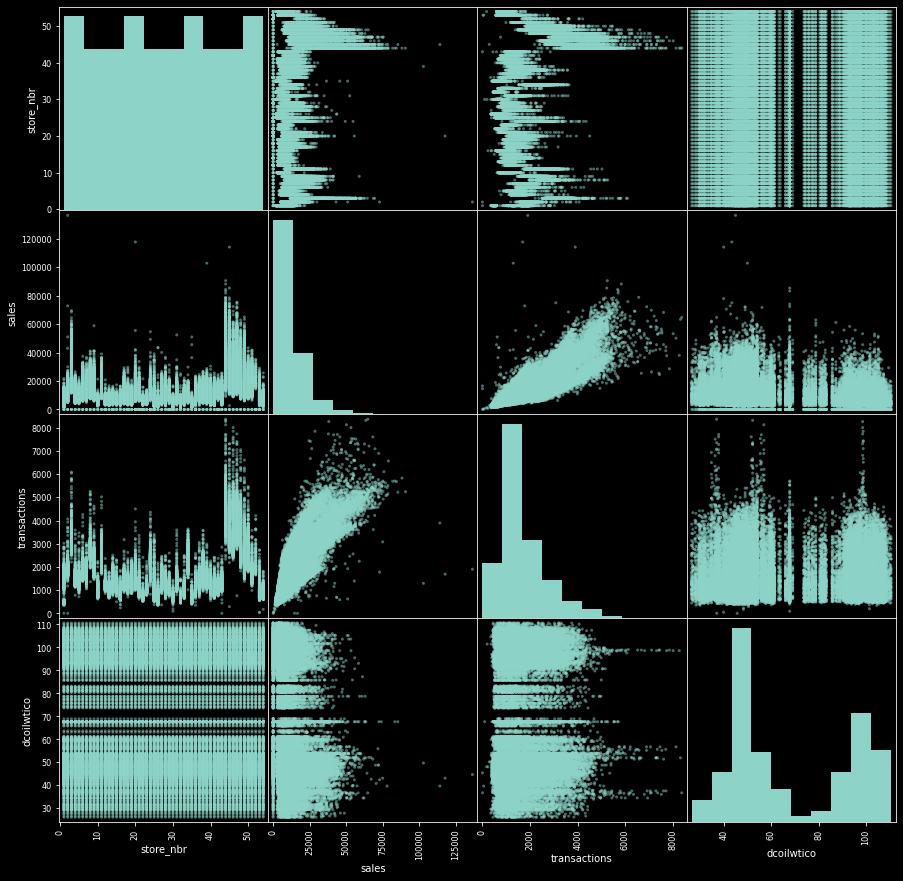

In [93]:
pd.plotting.scatter_matrix(temp_oil, figsize=(15,15))

Now we get the correlation for total family sales against oilprice

In [94]:
aux_train = df_train.groupby(["date", "family"]).sales.sum().reset_index()
aux = pd.merge(aux_train,df_oil, how = "left")
c = aux.groupby("family").corr()
c

sales  dcoilwtico
family                                                     
AUTOMOTIVE                 sales       1.000000   -0.571906
                           dcoilwtico -0.571906    1.000000
BABY CARE                  sales       1.000000   -0.536114
                           dcoilwtico -0.536114    1.000000
BEAUTY                     sales       1.000000   -0.597332
...                                         ...         ...
PRODUCE                    dcoilwtico -0.643367    1.000000
SCHOOL AND OFFICE SUPPLIES sales       1.000000   -0.231138
                           dcoilwtico -0.231138    1.000000
SEAFOOD                    sales       1.000000   -0.270234
                           dcoilwtico -0.270234    1.000000

[66 rows x 2 columns]

Take a closer look to one of the graphs from the scatter matrix from above, we can se that some of the sales are 0 at the begining of 2013, which mean we have to delete this values to make a better predetion

<AxesSubplot:xlabel='date'>

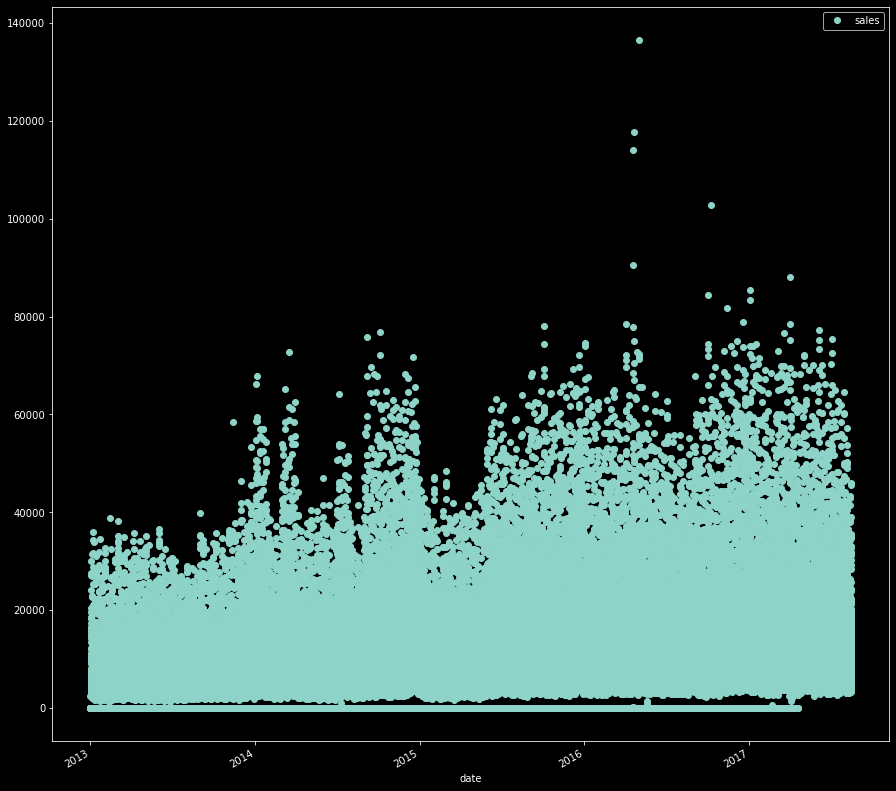

In [95]:
a = df_train.set_index("date").groupby("store_nbr").resample("D").sales.sum().reset_index()
a.plot(x="date",y="sales",style='o',figsize = (15,15))

In [103]:
print(df_train.shape)
df_train = df_train[~((df_train.store_nbr == 52) & (df_train.date < "2017-04-20"))]
df_train = df_train[~((df_train.store_nbr == 22) & (df_train.date < "2015-10-09"))]
df_train = df_train[~((df_train.store_nbr == 42) & (df_train.date < "2015-08-21"))]
df_train = df_train[~((df_train.store_nbr == 21) & (df_train.date < "2015-07-24"))]
df_train = df_train[~((df_train.store_nbr == 29) & (df_train.date < "2015-03-20"))]
df_train = df_train[~((df_train.store_nbr == 20) & (df_train.date < "2015-02-13"))]
df_train = df_train[~((df_train.store_nbr == 53) & (df_train.date < "2014-05-29"))]
df_train = df_train[~((df_train.store_nbr == 36) & (df_train.date < "2013-05-09"))]
df_train.shape

(3000888, 6)


(2780316, 6)

Some stores doesn't sell some product families so we will be deleting them:

In [104]:
aux = df_train.groupby(["store_nbr", "family"]).sales.sum().reset_index()
aux = aux.sort_values(["family","store_nbr"])
aux = aux[aux.sales == 0]
aux

store_nbr           family  sales
1             1        BABY CARE    0.0
397          13        BABY CARE    0.0
727          23        BABY CARE    0.0
1420         44        BABY CARE    0.0
1453         45        BABY CARE    0.0
1486         46        BABY CARE    0.0
1519         47        BABY CARE    0.0
1552         48        BABY CARE    0.0
1585         49        BABY CARE    0.0
1618         50        BABY CARE    0.0
1651         51        BABY CARE    0.0
1684         52        BABY CARE    0.0
268           9            BOOKS    0.0
301          10            BOOKS    0.0
334          11            BOOKS    0.0
367          12            BOOKS    0.0
400          13            BOOKS    0.0
433          14            BOOKS    0.0
466          15            BOOKS    0.0
499          16            BOOKS    0.0
532          17            BOOKS    0.0
565          18            BOOKS    0.0
598          19            BOOKS    0.0
631          20            BOOKS    0.0
664          21            BOOKS    0.0
697          22            BOOKS    0.0
895          28            BOOKS    0.0
928          29            BOOKS    0.0
961          30            BOOKS    0.0
994          31            BOOKS    0.0
1027         32            BOOKS    0.0
1060         33            BOOKS    0.0
1093         34            BOOKS    0.0
1126         35            BOOKS    0.0
1159         36            BOOKS    0.0
1258         39            BOOKS    0.0
1291         40            BOOKS    0.0
1390         43            BOOKS    0.0
1687         52            BOOKS    0.0
1753         54            BOOKS    0.0
514          16       LADIESWEAR    0.0
811          25       LADIESWEAR    0.0
910          28       LADIESWEAR    0.0
943          29       LADIESWEAR    0.0
1042         32       LADIESWEAR    0.0
1075         33       LADIESWEAR    0.0
1141         35       LADIESWEAR    0.0
1306         40       LADIESWEAR    0.0
1405         43       LADIESWEAR    0.0
1768         54       LADIESWEAR    0.0
449          14  LAWN AND GARDEN    0.0
977          30  LAWN AND GARDEN    0.0
1769         54  LAWN AND GARDEN    0.0

In [105]:
print(df_train.shape)
join = df_train.merge(aux[aux.sales == 0].drop("sales",axis = 1), how = 'outer', indicator = True)
df_train = join[~(join._merge == 'both')].drop('_merge', axis = 1)
del join
print(df_train.shape)

(2780316, 6)
(2698648, 6)
